<a href="https://colab.research.google.com/github/artemguivan/Hotdog_NotHotdog_Classifier_SiliconValley/blob/main/transfer_learning_in_keras1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Джарвис, сделай мне нейронную сеть, классифицирующую хот-доги

# 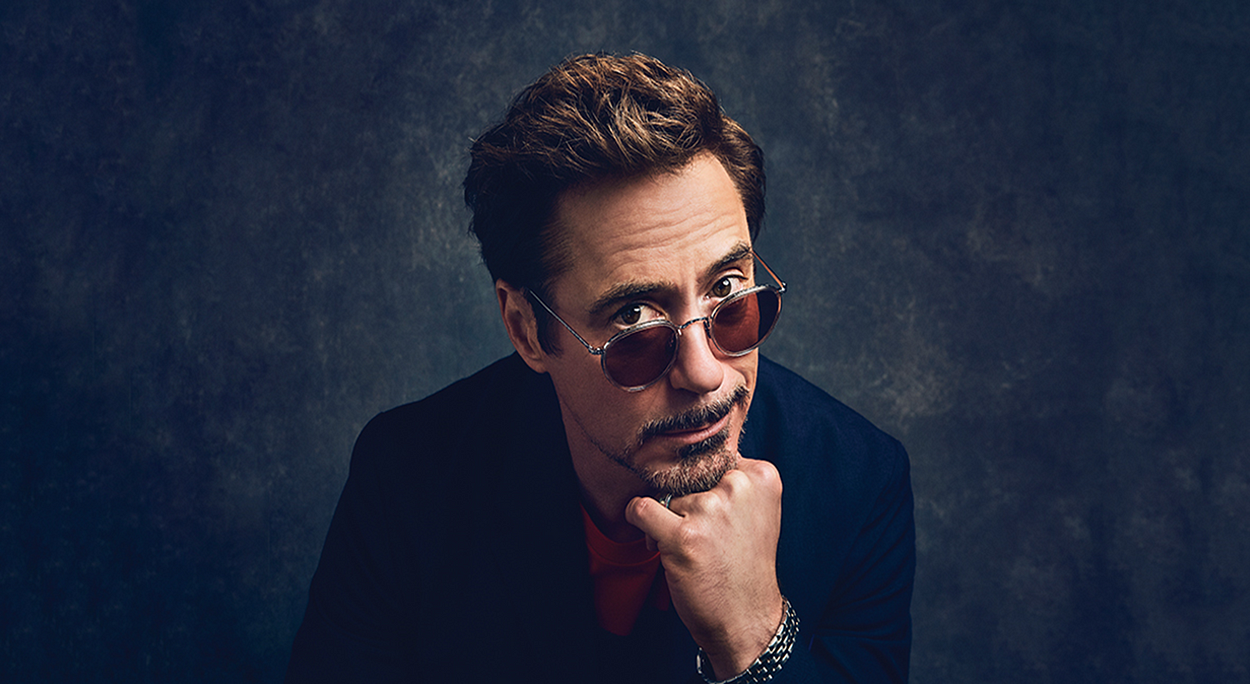




#### Подгружаем библиотеки

In [7]:
from keras.applications.vgg19 import VGG19
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img

import PIL
from PIL import Image as img
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

#### Подгружаем pre-trained VGG19

In [2]:
vgg19 = VGG19(include_top=False,
              weights='imagenet',
              input_shape=(224,224,3),
              pooling=None)

80134624/80134624 [==============================] - 3s 0us/step


#### Замораживаем слои

In [5]:
for layer in vgg19.layers:
    layer.trainable = False


for layer in vgg19.layers: layer.trainable = False  
---

---
 замораживает все слои в модели VGG19. Это означает, что веса этих слоев больше не будут обновляться во время обучения модели. Это может быть полезно, если вы хотите использовать предварительно обученную модель для задачи, отличной от той, на которой она была обучена изначально. Замораживая нижние слои модели, вы можете предотвратить переобучение модели на данных обучающего набора и улучшить ее обобщающую способность.

Вот более подробное объяснение того, что делает код.

vgg19 - это объект модели VGG19.
layers - это атрибут объекта vgg19, который возвращает список всех слоев модели.
for loop итерирует по списку слоев модели.
layer.trainable - это атрибут объекта слоя, который указывает, является ли слой обучаемым.
layer.trainable = False устанавливает атрибут trainable слоя в False, что замораживает слой.

#### Добавляем слои


In [6]:
model_vgg = Sequential()
model_vgg.add(vgg19)


model_vgg.add(Flatten(name='flattened'))
model_vgg.add(Dropout(0.5, name='dropout'))
model_vgg.add(Dense(2, activation='softmax', name='predictions'))

# примерно так выглядел бы код ,если бы мы не использовали предобученную модель

model.add(Conv2D(64, 3, activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(512, 3, activation='relu'))
model.add(Conv2D(512, 3, activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(256, 3, activation='relu'))
model.add(Conv2D(256, 3, activation='relu'))
model.add(Conv2D(256, 3, activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(512, 3, activation='relu'))
model.add(Conv2D(512, 3, activation='relu'))
model.add(Conv2D(512, 3, activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(512, 3, activation='relu'))
model.add(Conv2D(512, 3, activation='relu'))
model.add(Conv2D(512, 3, activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

# скачиваем данные


In [9]:
!unzip -q /content/archive.zip

бинарная кросс-энтропия с котиками и пандами https://skine.ru/articles/238472/

Можете скачать данные здесь
 https://www.kaggle.com/datasets/dansbecker/hot-dog-not-hot-dog

подробнее про метрики https://habr.com/ru/companies/ods/articles/328372/

 подробнее об оптимизаторах https://habr.com/ru/companies/skillfactory/articles/525214/

####  

In [10]:
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### подготавливаем данные для обучения

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    data_format='channels_last',
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='reflect')

valid_datagen = ImageDataGenerator(
    rescale=1.0/255,
    data_format='channels_last')

In [12]:
train_generator = train_datagen.flow_from_directory(
    directory='./train',
    target_size=(224, 224),
    classes=['hot_dog','not_hot_dog'],
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42)

valid_generator = valid_datagen.flow_from_directory(
    directory='./test',
    target_size=(224, 224),
    classes=['hot_dog','not_hot_dog'],
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42)

Found 498 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


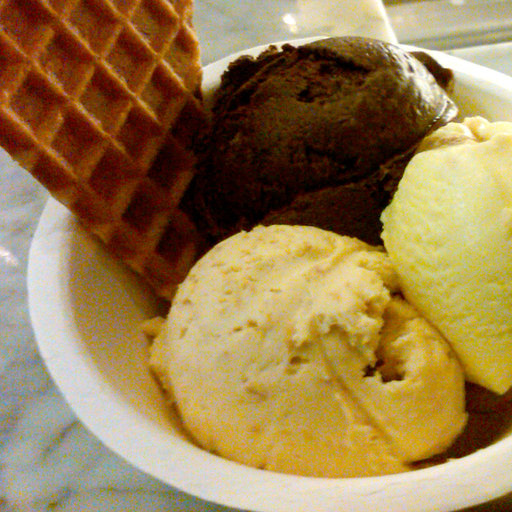

In [14]:
img.open('/content/test/not_hot_dog/15420.jpg')

In [26]:
history = model_vgg.fit_generator(train_generator, steps_per_epoch=10,
                    epochs=17, validation_data=valid_generator,
                    validation_steps=10)

<ipython-input-26-f31b5a3034f0>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_vgg.fit_generator(train_generator, steps_per_epoch=10,


Epoch 1/2
10/10 [==============================] - 9s 842ms/step - loss: 0.6093 - accuracy: 0.7063 - val_loss: 0.5656 - val_accuracy: 0.7344
Epoch 2/2
10/10 [==============================] - 6s 628ms/step - loss: 0.5029 - accuracy: 0.7582 - val_loss: 0.4643 - val_accuracy: 0.7969


Эпохи (epochs) указывают, сколько раз модель будет обучаться на всем обучающем наборе данных. Здесь модель будет обучаться в течение 17 эпох.

steps_per_epoch указывает, сколько итераций будет выполнено на каждую эпоху. Здесь будет выполнено 10 шагов на каждую эпоху.

validation_data представляет собой генератор данных для валидационного набора данных, который будет использоваться для оценки производительности модели после каждой эпохи обучения.

validation_steps указывает, сколько шагов будет выполнено на валидационном наборе данных после каждой эпохи обучения. Здесь будет выполнено 10 шагов на каждую эпоху валидации.

Весь этот код позволяет обучить модель VGG на обучающем наборе данных и оценить ее производительность на валидационном наборе данных после каждой эпохи обучения.

# Графическое представление обучения

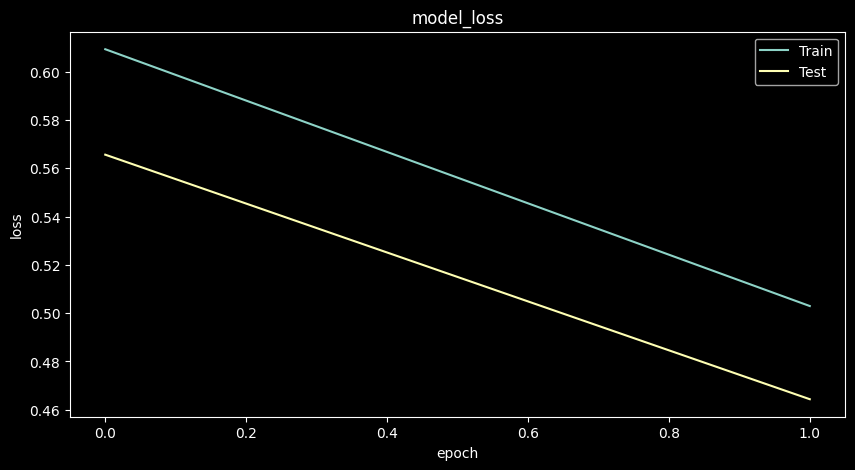

In [29]:
plt.style.use(['dark_background'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])

In [17]:
# сохраняем веса модели
model_vgg.save('model_vgg.h5')

In [18]:
# загружаем веса
model_vgg = load_model('model_vgg.h5')

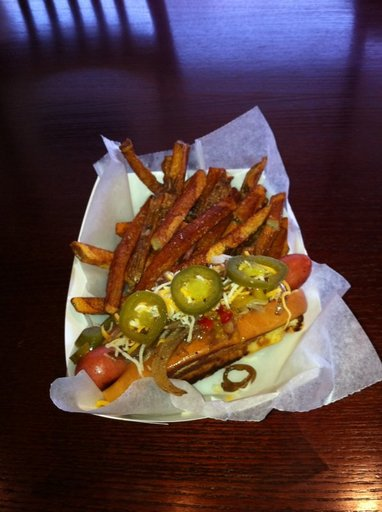

In [20]:
img.open('/content/test/hot_dog/133012.jpg')

In [22]:
img_path = '/content/test/hot_dog/133012.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = expanded_img_array / 255.
prediction = model_vgg.predict(preprocessed_img)
class_labels = ['hot_dog', 'not_hot_dog']
index = np.argmax(prediction)

1/1 [==============================] - 1s 1s/step


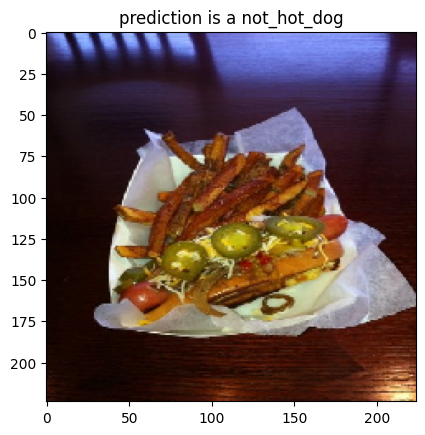

In [23]:
plt.imshow(img);
plt.title('prediction is a ' + class_labels[index]);

In [24]:
img_path = '/content/test/hot_dog/138937.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = expanded_img_array / 255.
prediction = model_vgg.predict(preprocessed_img)
class_labels = ['hot_dog', 'not_hot_dog']
index = np.argmax(prediction)

1/1 [==============================] - 0s 31ms/step


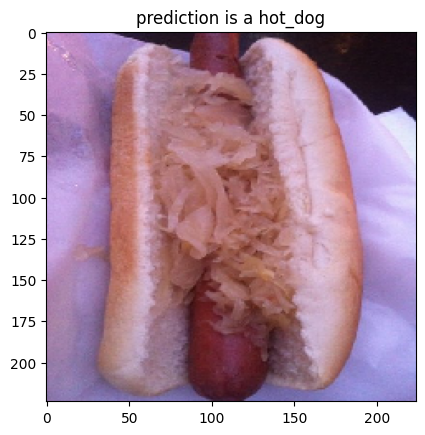

In [25]:
plt.imshow(img);
plt.title('prediction is a ' + class_labels[index]);

# Отлично, Вы великолепны!